<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


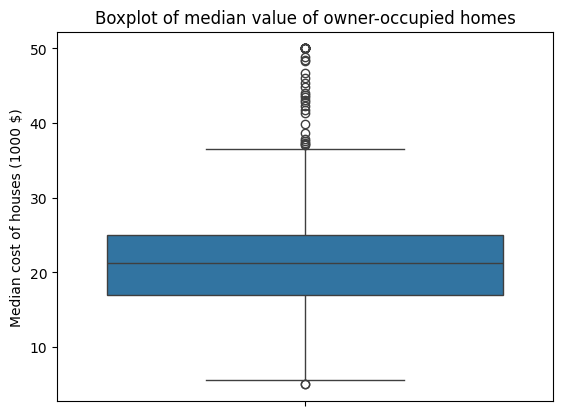

In [9]:
sns.boxplot(y=boston_df["MEDV"])
pyplot.ylabel("Median cost of houses (1000 $)")
pyplot.title("Boxplot of median value of owner-occupied homes")
pyplot.show()

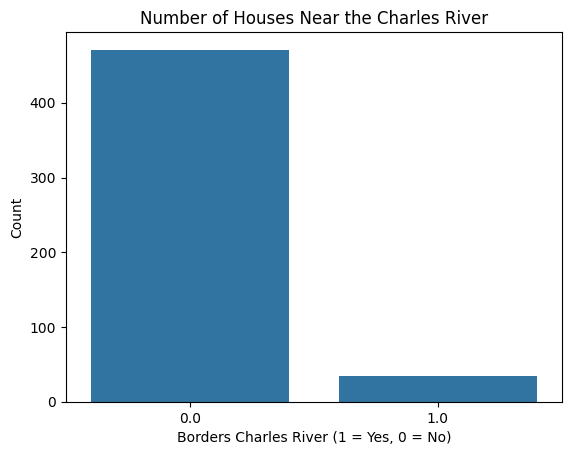

In [10]:
sns.countplot(x=boston_df["CHAS"])
pyplot.xlabel("Borders Charles River (1 = Yes, 0 = No)")
pyplot.ylabel("Count")
pyplot.title("Number of Houses Near the Charles River")
pyplot.show()

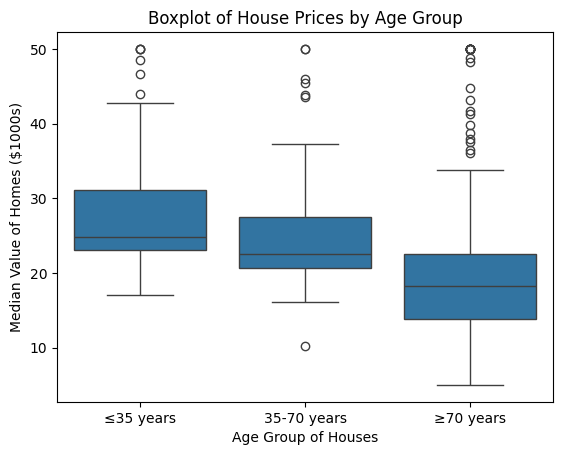

In [11]:
boston_df["AGE_Group"] = pd.cut(boston_df["AGE"], bins=[0,35,70,100], labels=["≤35 years", "35-70 years", "≥70 years"])
sns.boxplot(y=boston_df["MEDV"], x=boston_df["AGE_Group"])
pyplot.xlabel("Age Group of Houses")
pyplot.ylabel("Median Value of Homes ($1000s)")
pyplot.title("Boxplot of House Prices by Age Group")
pyplot.show()

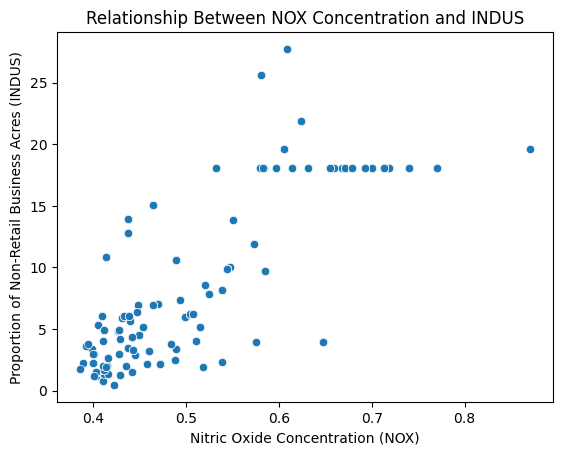

In [12]:
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"])
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.title("Relationship Between NOX Concentration and INDUS")
pyplot.show()

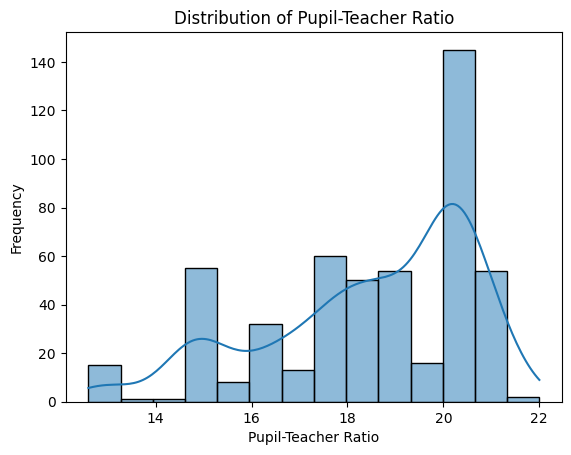

In [13]:
sns.histplot(boston_df["PTRATIO"], kde=True)
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.title("Distribution of Pupil-Teacher Ratio")
pyplot.show()

In [14]:
t_res = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)
print(t_res)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


In [ ]:
#### P-value < 0.05. This means that there is a statistically significant difference in the median house values between homes near the Charles River and those that are not.

In [15]:
young = boston_df[boston_df["AGE_Group"] == "≤35 years"]["MEDV"]
middle = boston_df[boston_df["AGE_Group"] == "35-70 years"]["MEDV"]
old = boston_df[boston_df["AGE_Group"] == "≥70 years"]["MEDV"]
f_res = scipy.stats.f_oneway(young, middle, old)
print(f_res)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


In [ ]:
#### P-value < 0.05. This means that there is a statistically significant difference in median house values (MEDV) among the different age groups build prior to 1940.

In [16]:
corr = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(corr)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


In [ ]:
#### P-value < 0.05. This means that there is a strong, statistically significant positive correlation between Nitric Oxide concentration (NOX) and the proportion of non-retail business acres (INDUS), and we reject the null hypothesis (H₀), so there is relationship between NOX and INDUS. 

In [17]:
X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        12:47:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#### P-value < 0.05. We reject the null hypothesis (H₀) and conclude that there is a statistically significant relationship between DIS and MEDV.